# ✈Aviation Flight Fare Prediction Model

<div style="flex:50%; padding:5px;">
    <img src="R.jpg">
</div>

# 📝Check List:
    1. 📚 Importing Libraries
    2. 📂 Loading Data
    3. 🔍 Discovering Data
        - ❓ Missing Values
        - 🔄 Duplicates
    4. 📊 EDA
        - ⭕ Categorical Columns
        - 🔢 Numerical Columns
        - ⏰ Time Columns
        - 🗑️ Dropping Unimportant Columns
    5. 🛠️ Feature Engineering 
        - ⚖️ Scaling
        - 🏷️ Encoding
        - 🗑️ Dropping Unimportant Columns
        - 🔬 PCA
    6. 📂 Splitting Data
    7. ⚙️ Initialize estimators and hyperparameters
    8. 📅 Grid Search CV
    9. 🎯 Randomized Search CV
    10. 📈 The best Model Training
    11. 💾 Saving the model
    12. 🧪 Test Data Preparation
    13. 🔄 Load the Model and Predict the Test Data

## 📚Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
from sklearn.pipeline import Pipeline

## 📂Loading Data

In [111]:
df = pd.read_csv( "Train set.csv")

In [112]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# 🔍Discovering Data

In [113]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## ❓Missing Values

In [115]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [116]:
#drop missing values
df.dropna(inplace=True)

In [117]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## 🔄Duplicates

In [118]:
df.duplicated().sum()

220

In [119]:
# drop the duplicate rows only
df.drop_duplicates(inplace=True, keep='first')

In [120]:
df.duplicated().sum()

0

# 📊EDA

## ⭕Categorical Columns

##### 'Airline' Column

In [121]:
df['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [122]:
df['Airline'].nunique()

12

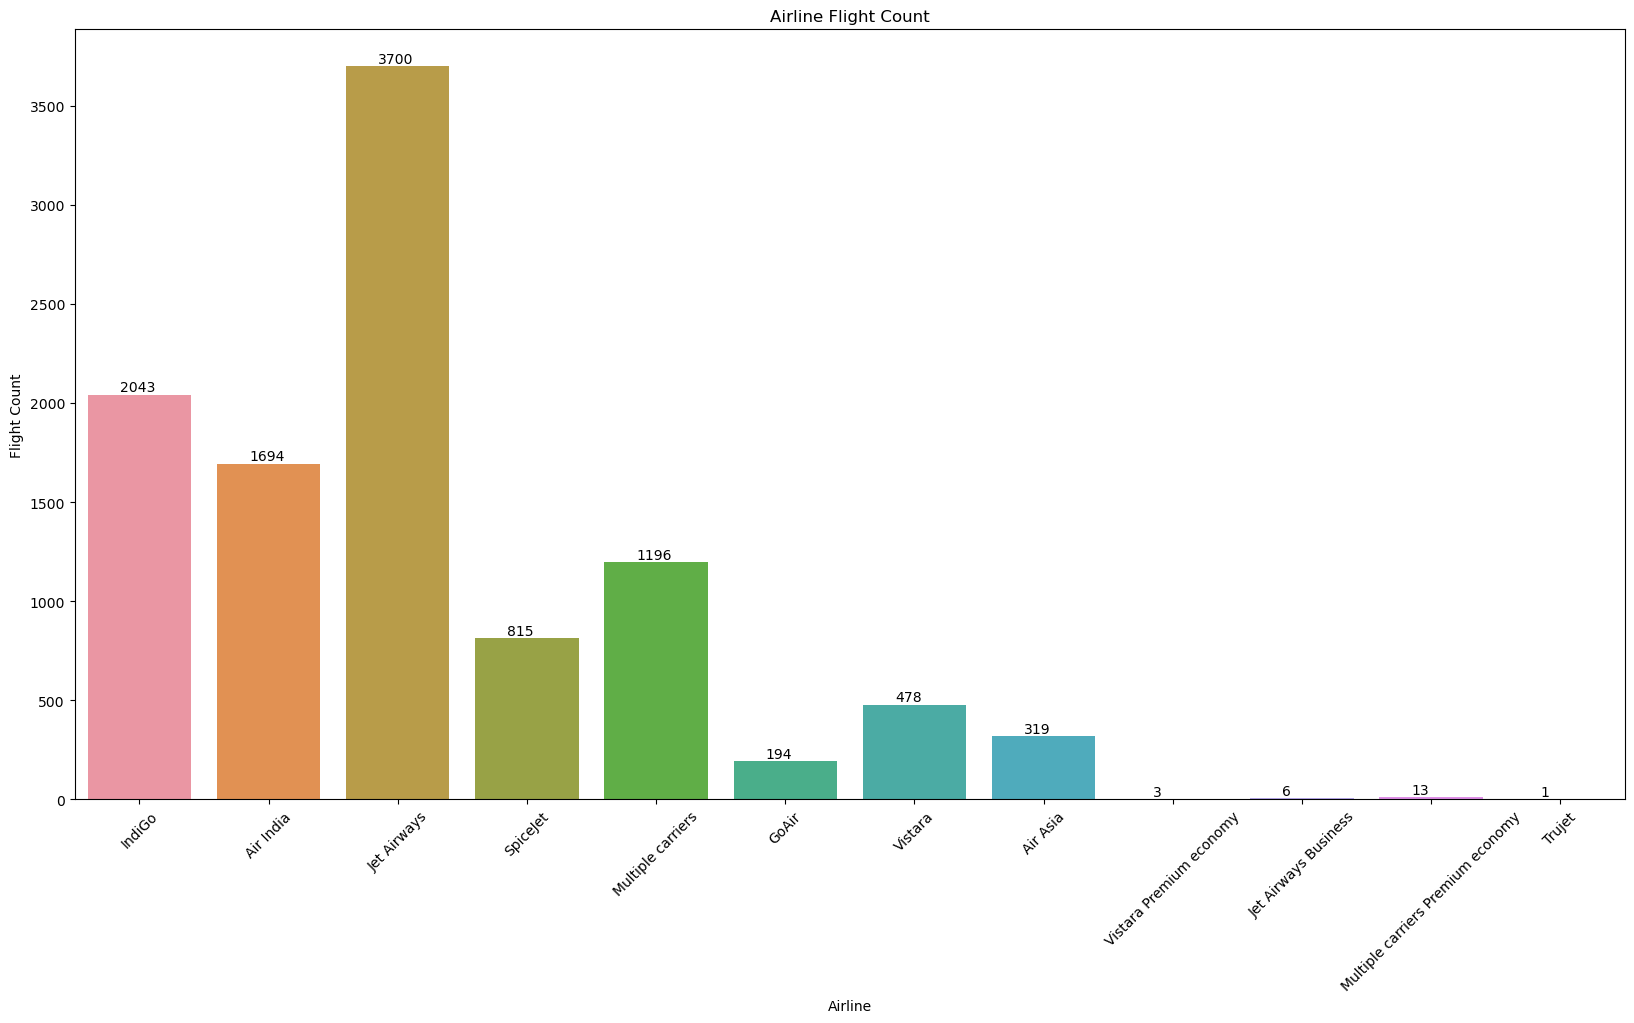

In [123]:
# Plotting Count Plot for Airlines
plt.figure(figsize =(20,10))
ax=sns.countplot(data=df, x='Airline')
# Set labels and title for the plot
plt.xlabel('Airline')
plt.ylabel('Flight Count')
plt.title('Airline Flight Count')
plt.xticks(rotation = 45)
# display numbers on the plot
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
# Display the plot
plt.show()

##### 'Additional_Info' Column

In [124]:
df['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [125]:
# replace No Info with No info
df['Additional_Info'] = df['Additional_Info'].str.replace('Info', 'info')

In [126]:
df['Additional_Info'].value_counts()

No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [127]:
df['Additional_Info'].nunique()

9

##### 'Destination' Column

In [128]:
df['Destination'].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

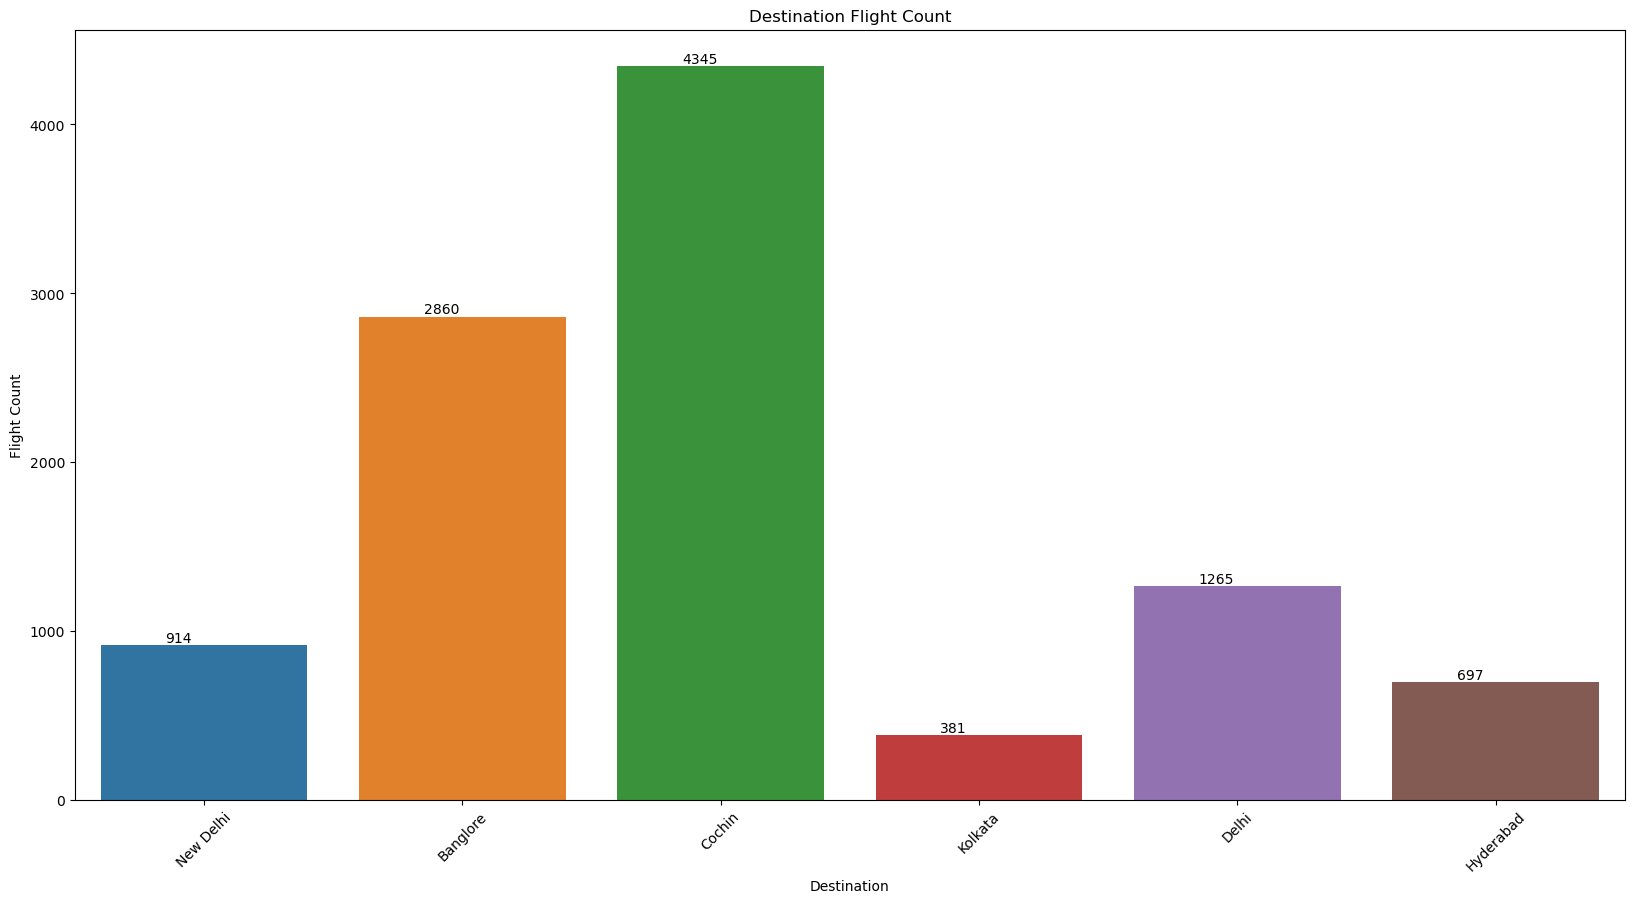

In [129]:
# Plotting count plot for destination Flights
plt.figure(figsize =(20,10))
ax=sns.countplot(data=df, x='Destination')

# Set labels and title for the plot
plt.xlabel('Destination')
plt.ylabel('Flight Count')
plt.title('Destination Flight Count')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
# Display the plot
plt.show()

In [130]:
df['Destination'].nunique()

6

##### 'Source' Column

In [131]:
df['Source'].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

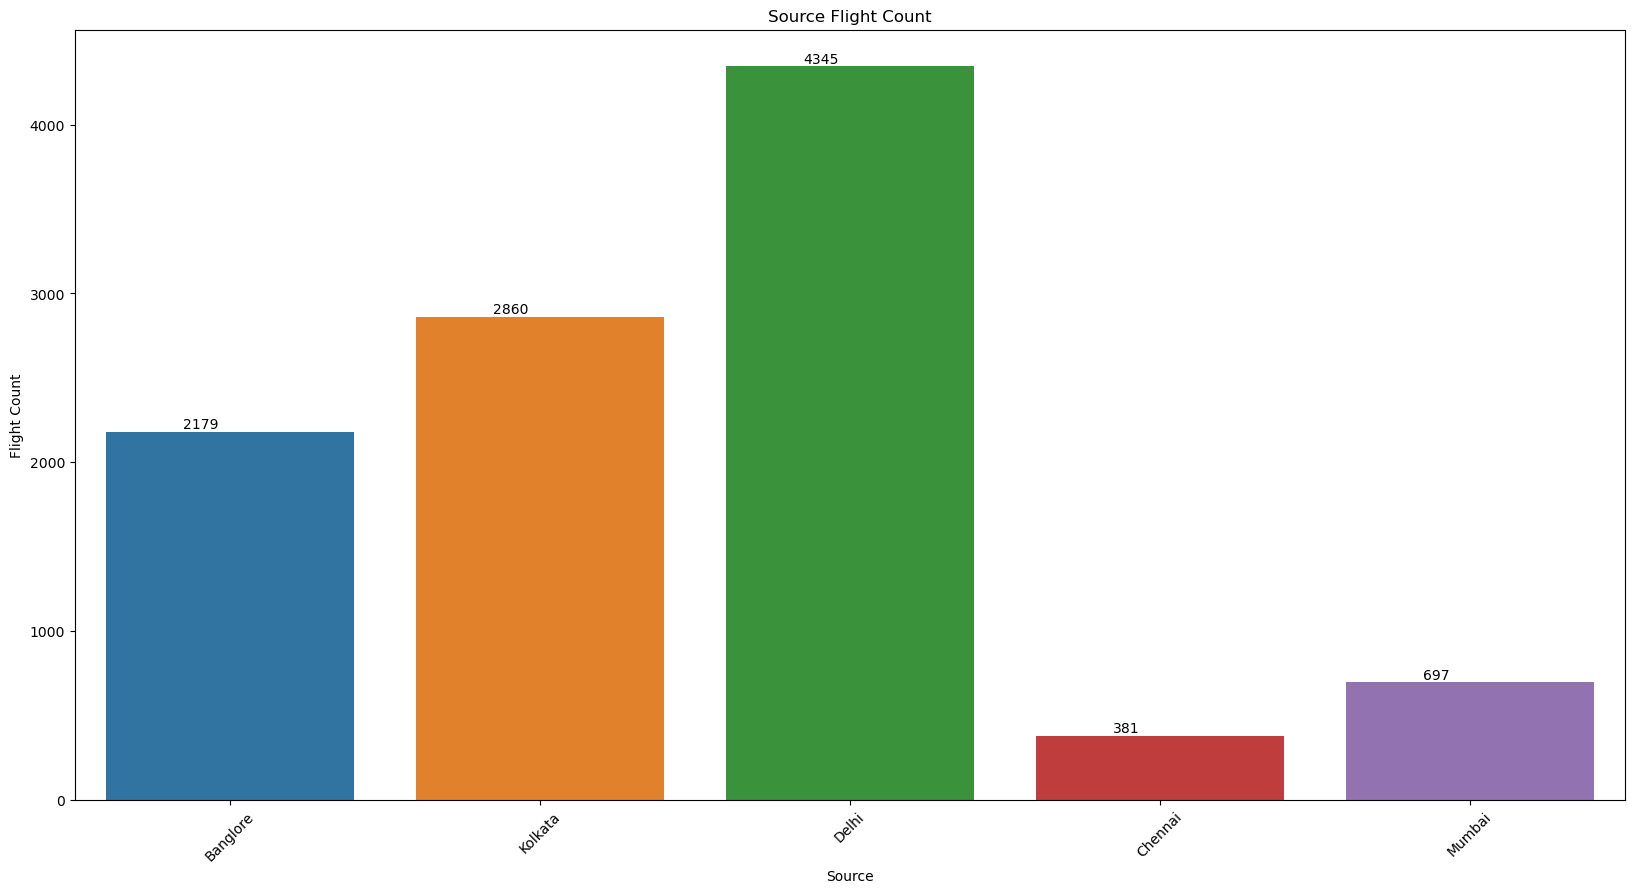

In [132]:
#Plotting count Plot for Source of Flights
plt.figure(figsize =(20,10))
ax=sns.countplot(data=df, x='Source')
# Set labels and title for the plot
plt.xlabel('Source')
plt.ylabel('Flight Count')
plt.title('Source Flight Count')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
# Display the plot
plt.show()

In [133]:
df['Source'].nunique()

5

##### 'Route' Column

In [134]:
df['Route'].nunique()

128

##### 'Total_Stops' Column

In [135]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [136]:
# delete stop word and keep number of stops only
df['Total_Stops'] = df['Total_Stops'].str.replace('non-stop','0').str.replace(' ', '')\
                                     .str.replace('stop','').str.replace('s','')

In [137]:
df['Total_Stops'].value_counts()

1    5625
0    3475
2    1318
3      43
4       1
Name: Total_Stops, dtype: int64

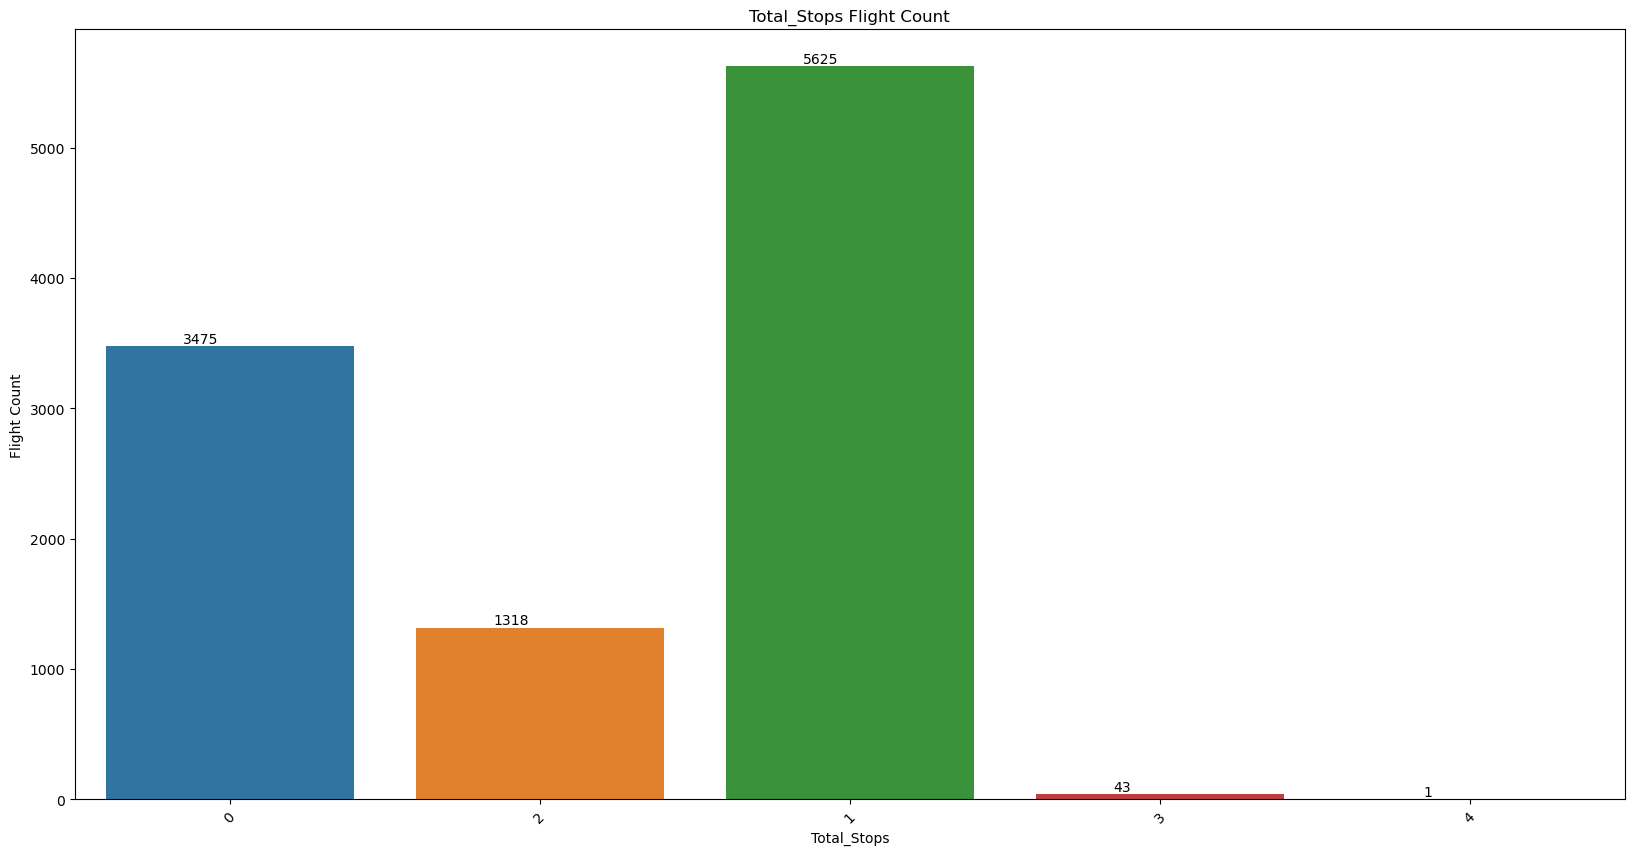

In [138]:
#Plotting count plot for stops in Flights
plt.figure(figsize =(20,10))
ax=sns.countplot(data=df, x='Total_Stops')
# Set labels and title for the plot
plt.xlabel('Total_Stops')
plt.ylabel('Flight Count')
plt.title('Total_Stops Flight Count')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
# Display the plot
plt.show()

In [139]:
df['Total_Stops'].nunique()

5

## 🔢Numerical Columns

In [140]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302


##### 'Duration' Column

In [141]:
df['Duration'].head()

0    2h 50m
1    7h 25m
2       19h
3    5h 25m
4    4h 45m
Name: Duration, dtype: object

In [142]:
# convert hours to minutes and delete 'h, m'.
df['Duration'] = df['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '')
# convert the column to int data type
df['Duration'] = df['Duration'].apply(eval).astype('int64')

In [143]:
df['Duration'].head()

0     170
1     445
2    1140
3     325
4     285
Name: Duration, dtype: int64

## ⏰Time Columns

#### 'Date_of_Journey' Column

In [144]:
# Extract day, month, and year from 'Date_of_Journey' column
df[['Day', 'Month', 'Year']] = df['Date_of_Journey'].str.split('/', expand=True)

In [145]:
# check values of days
df['Day'].value_counts()

9     1275
6     1173
27    1092
21    1085
24    1022
15     967
12     946
1      907
18     814
3      743
01     151
09     100
06      95
03      92
Name: Day, dtype: int64

In [146]:
# delete 0 from the day number
df['Day'] = df['Day'].str.replace('0', '')

In [147]:
df['Day'].unique()

array(['24', '1', '9', '12', '27', '18', '3', '15', '6', '21'],
      dtype=object)

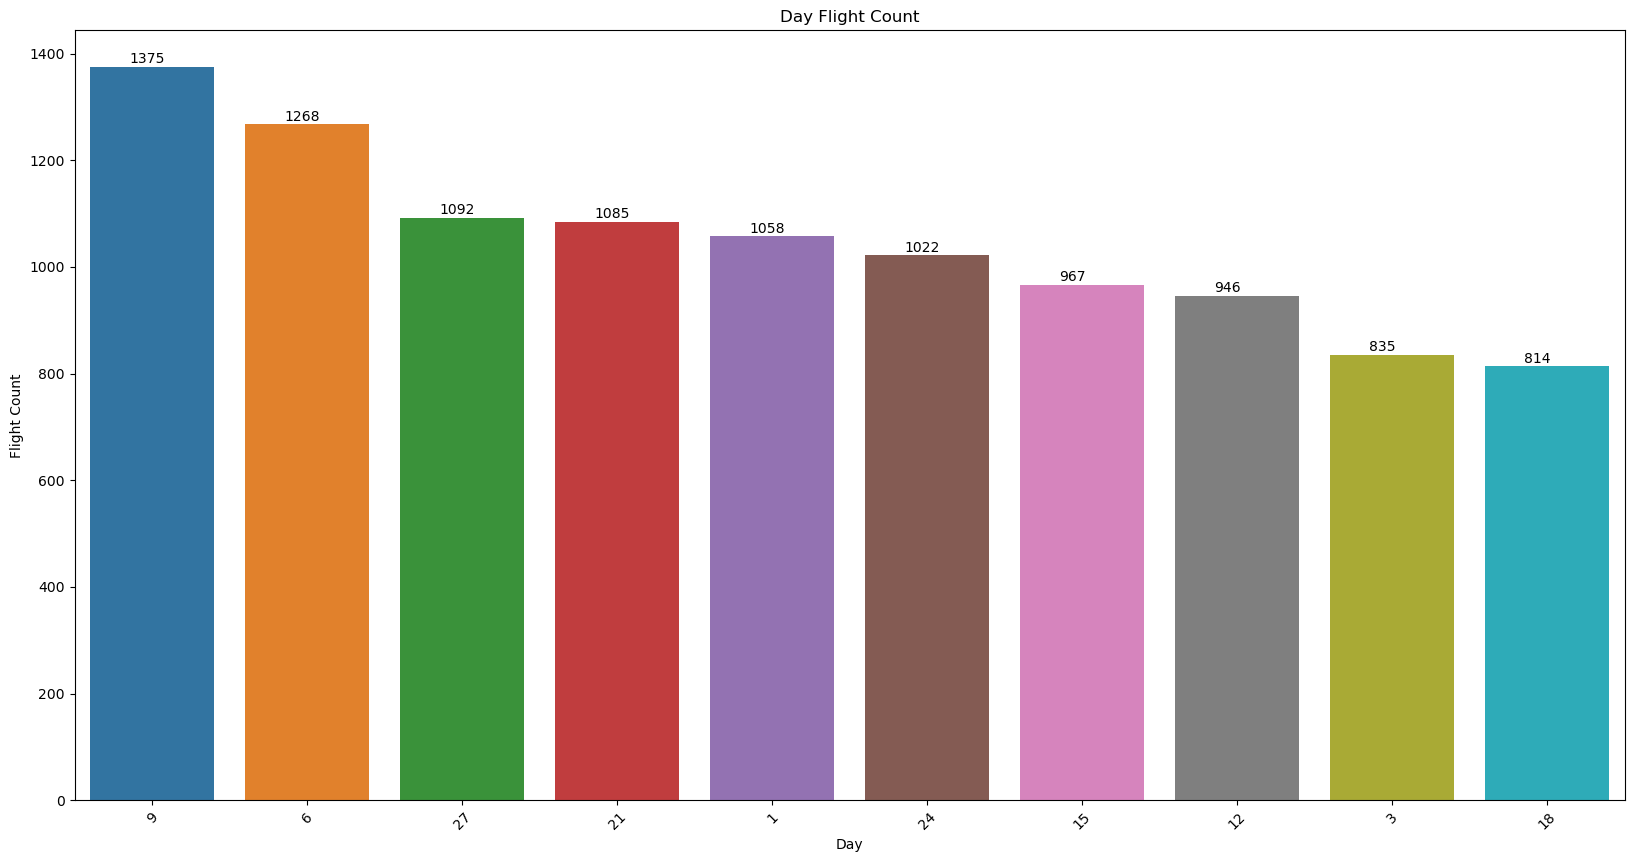

In [148]:
# Plotting count Plot for Day flights
plt.figure(figsize=(20, 10))
sorted_df = df['Day'].value_counts().sort_values(ascending=False)
ax = sns.countplot(data=df, x='Day', order=sorted_df.index)

# Set labels and title for the plot
plt.xlabel('Day')
plt.ylabel('Flight Count')
plt.title('Day Flight Count')
plt.xticks(rotation=45)

# Annotate the count values on top of each bar
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), va='bottom', color='black')

# Display the plot
plt.show()

In [149]:
# check values of Months
df['Month'].value_counts()

05    3395
06    3311
03    2678
04    1078
Name: Month, dtype: int64

In [150]:
# delete 0 from the Month number
df['Month'] = df['Month'].str.replace('0', '')

In [151]:
df['Month'].unique()

array(['3', '5', '6', '4'], dtype=object)

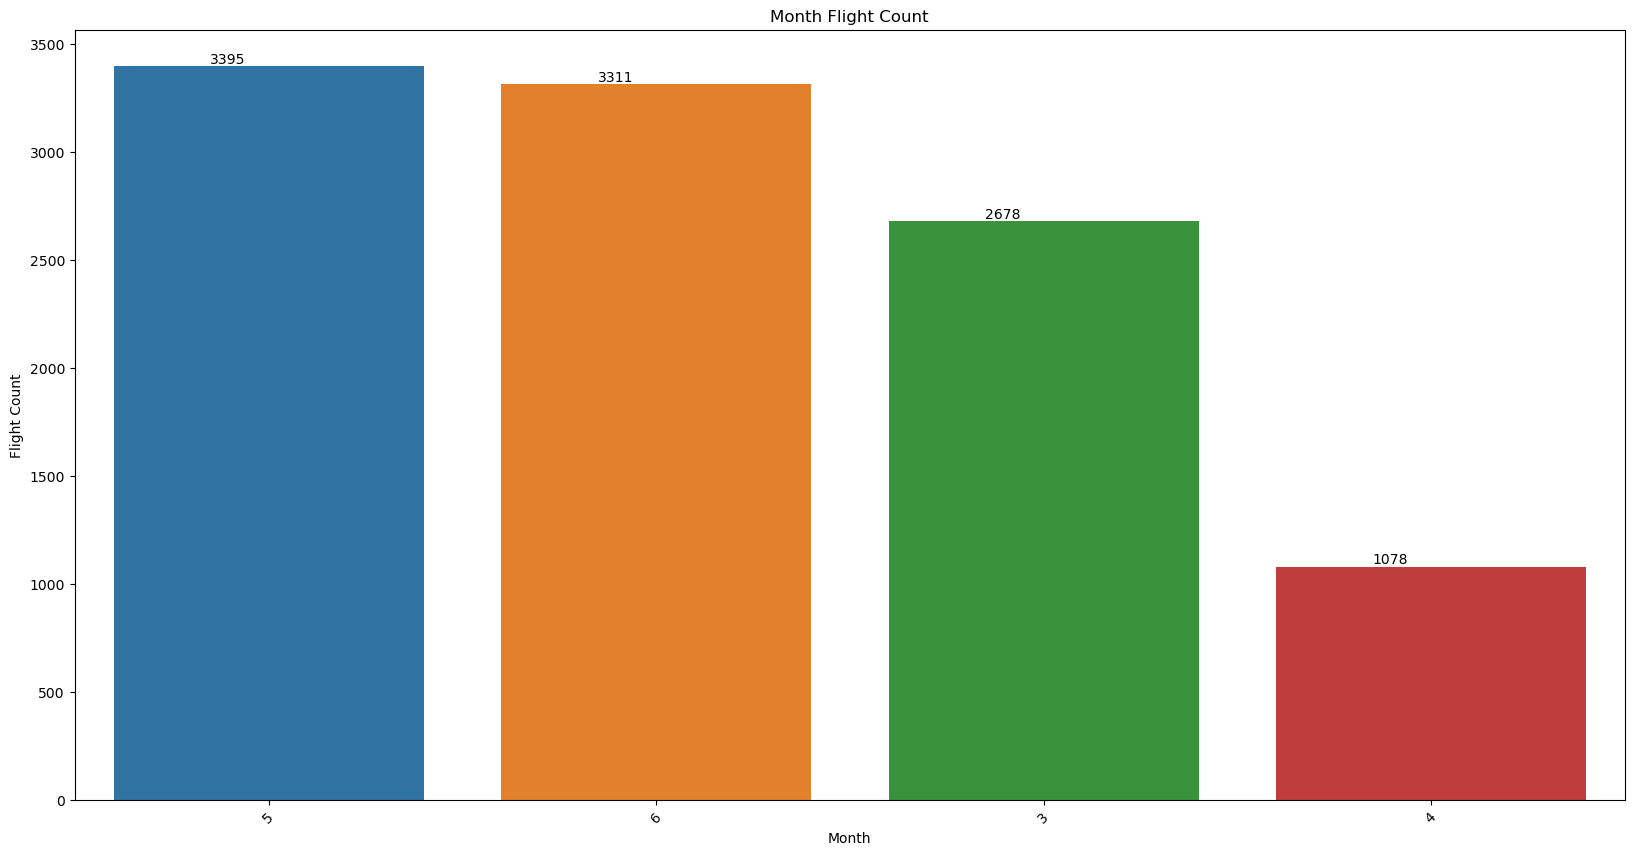

In [152]:
# Plotting count Plot for Month flights
plt.figure(figsize=(20, 10))
sorted_df = df['Month'].value_counts().sort_values(ascending=False)
ax = sns.countplot(data=df, x='Month', order=sorted_df.index)

# Set labels and title for the plot
plt.xlabel('Month')
plt.ylabel('Flight Count')
plt.title('Month Flight Count')
plt.xticks(rotation=45)

# Annotate the count values on top of each bar
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), va='bottom', color='black')

# Display the plot
plt.show()

In [153]:
# # check values of Years
df['Year'].value_counts()

2019    10462
Name: Year, dtype: int64

#### 'Dep_Time' Column

In [154]:
# convert Dep_Time column to datetime object
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])

In [155]:
# increase the hour if the minutes above 30
def apro_time(time):
    adjusted_time = time + pd.DateOffset(hours=1) if time.minute > 30 else time
    
    return adjusted_time.hour

In [156]:
# apply 'apro_time' on 'Dep_Time' column
df['Dep_Hour'] = df['Dep_Time'].apply(apro_time)

## 🗑️ Dropping Unimportant Columns

In [157]:
# delete unimportant columns
df = df.drop(['Date_of_Journey', 'Route', 'Arrival_Time', 'Dep_Time', 'Year'], axis=1)

In [158]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hour
0,IndiGo,Banglore,New Delhi,170,0,No info,3897,24,3,22
1,Air India,Kolkata,Banglore,445,2,No info,7662,1,5,6
2,Jet Airways,Delhi,Cochin,1140,2,No info,13882,9,6,9
3,IndiGo,Kolkata,Banglore,325,1,No info,6218,12,5,18
4,IndiGo,Banglore,New Delhi,285,1,No info,13302,1,3,17


In [159]:
# Save Cleaned data
df.to_csv('cleaned_df.csv')

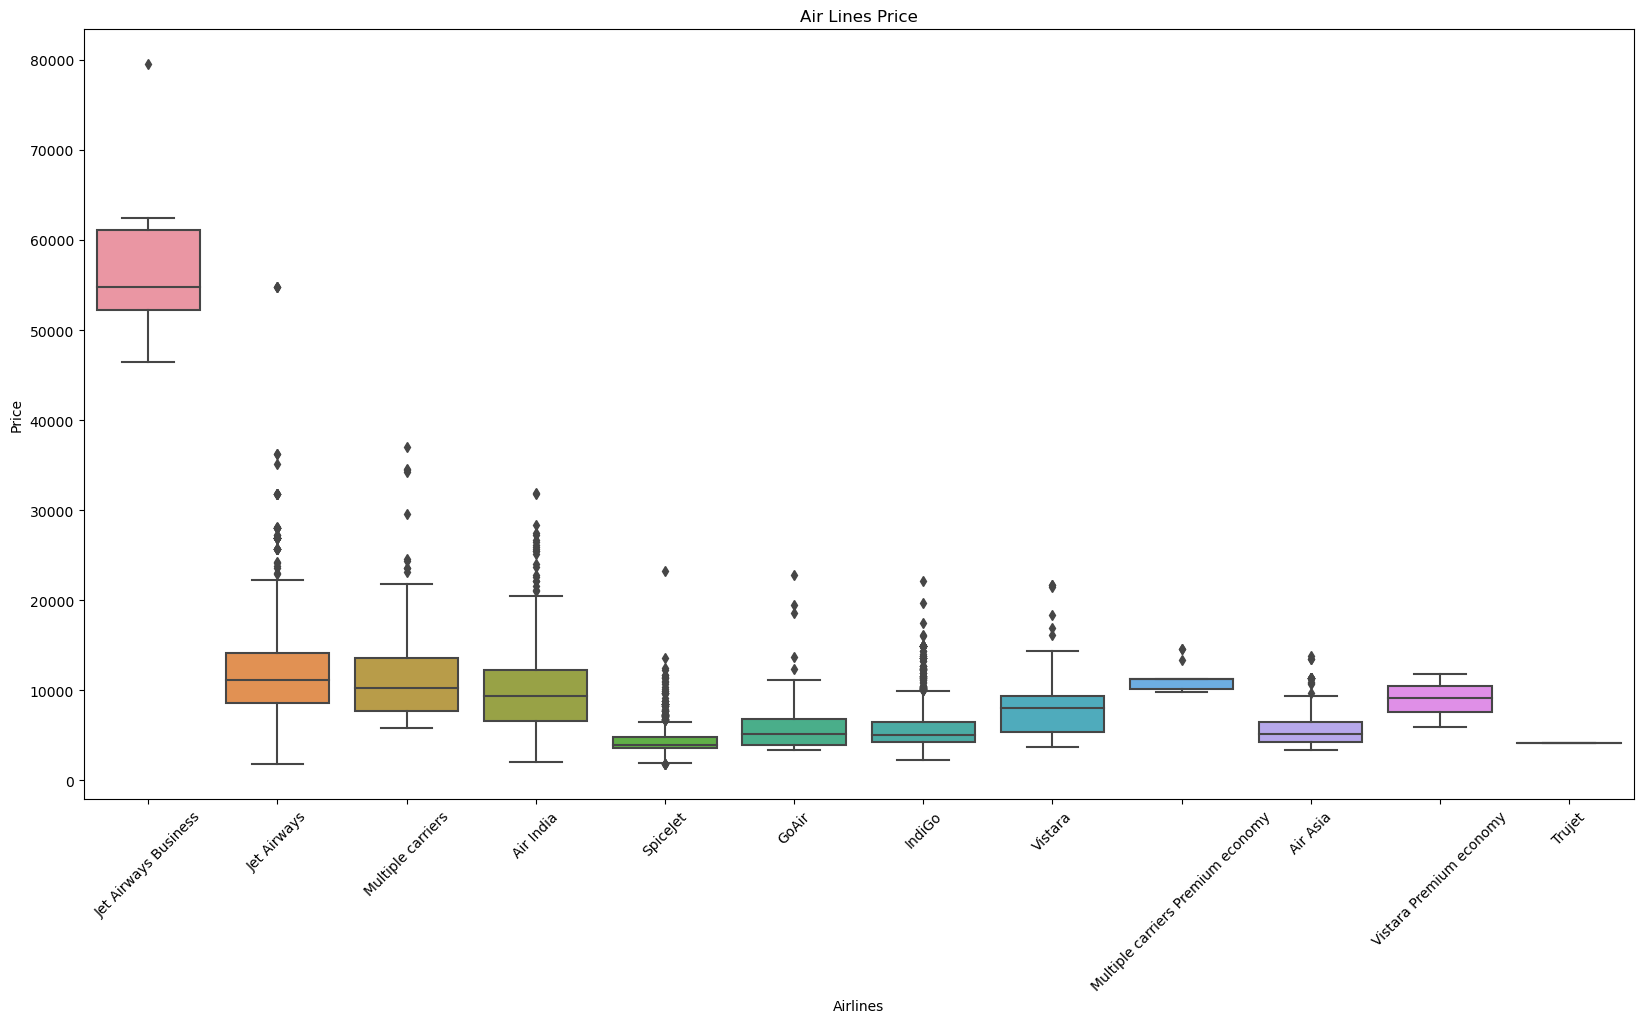

In [160]:
# Air line Prices
plt.figure(figsize=(20,10))

#Plotting box plot for price for each airline
sns.boxplot(data=df.sort_values('Price',ascending=False), x='Airline', y='Price')

# Set labels and title for the plot
plt.xlabel('Airlines')
plt.ylabel('Price')
plt.title('Air Lines Price')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

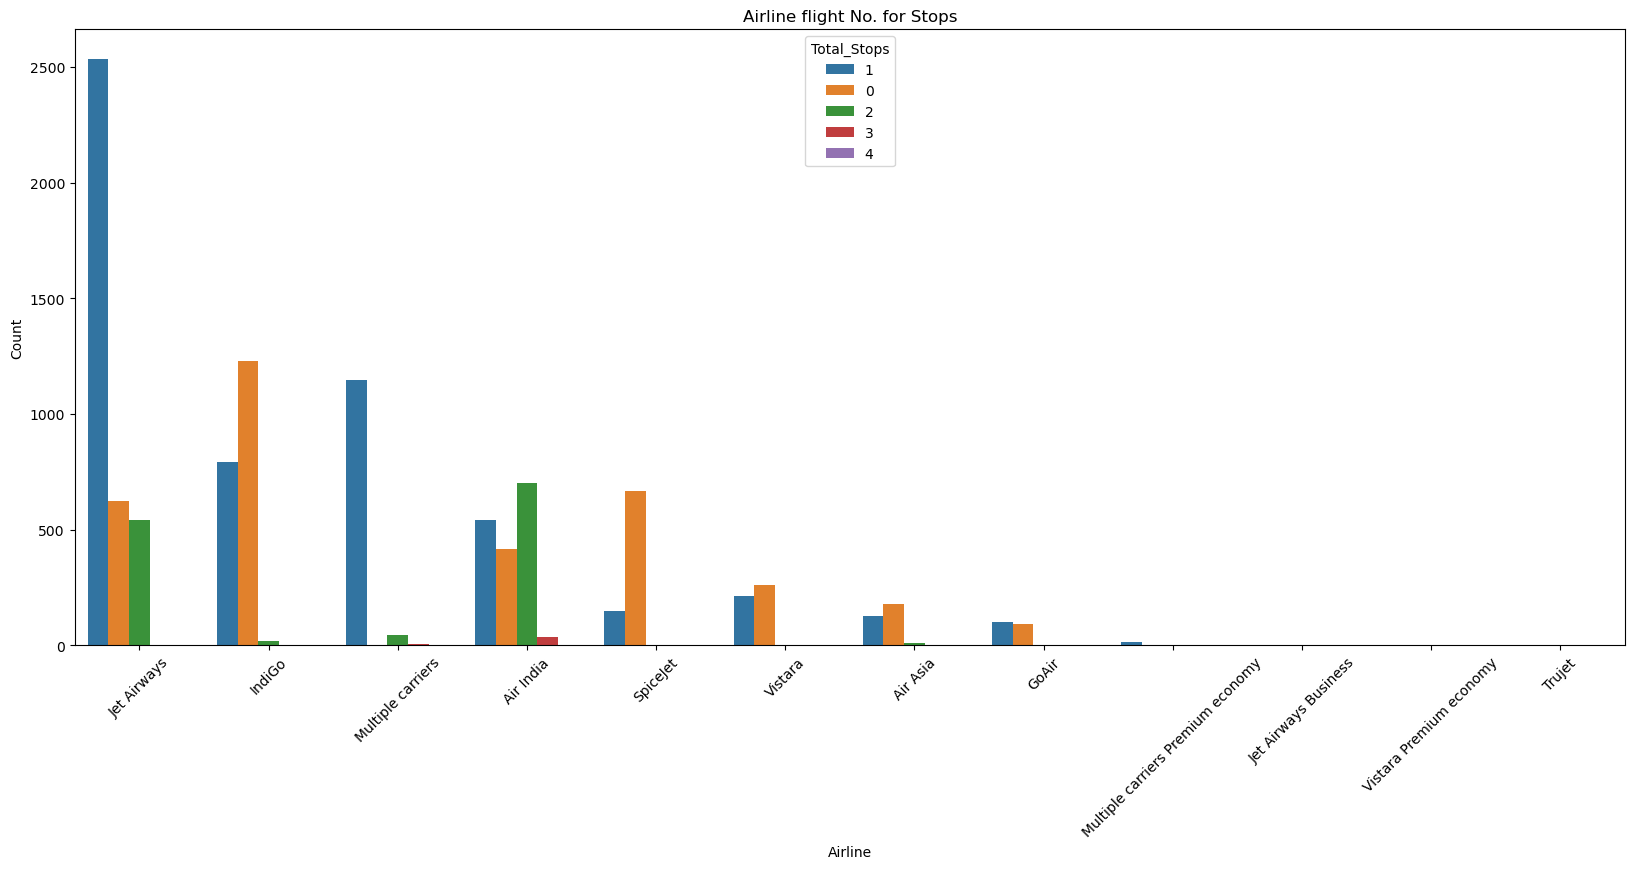

In [161]:
# Airline flights per stops
plt.figure(figsize =(20,8))

#Plotting Bar plot for No. of flights for each airline regarding to Flight stops
grouped_counts = df.groupby(['Airline', 'Total_Stops'])\
                .size().sort_values(ascending=False).reset_index(name='Count')

sns.barplot(data=grouped_counts, x='Airline', y='Count', hue='Total_Stops')

# Set labels and title for the plot
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Airline flight No. for Stops')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

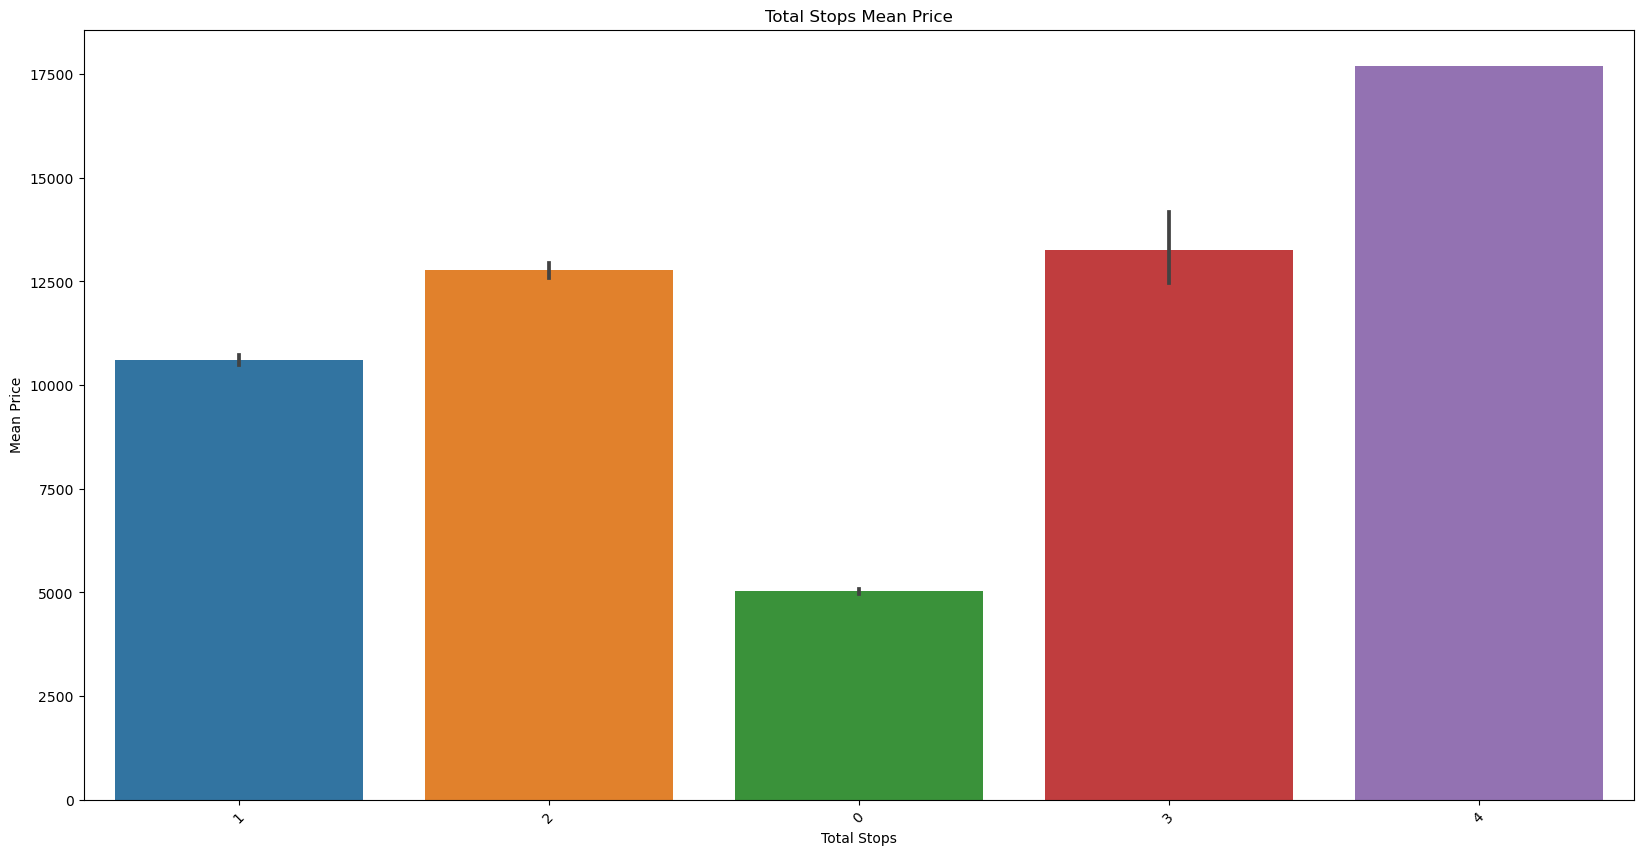

In [162]:
# Total_Stops vs Price
plt.figure(figsize=(20,10))

sns.barplot(data=df.sort_values('Price',ascending=False), x='Total_Stops', y='Price')

# Set labels and title for the plot
plt.xlabel('Total Stops')
plt.ylabel('Mean Price')
plt.title('Total Stops Mean Price')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

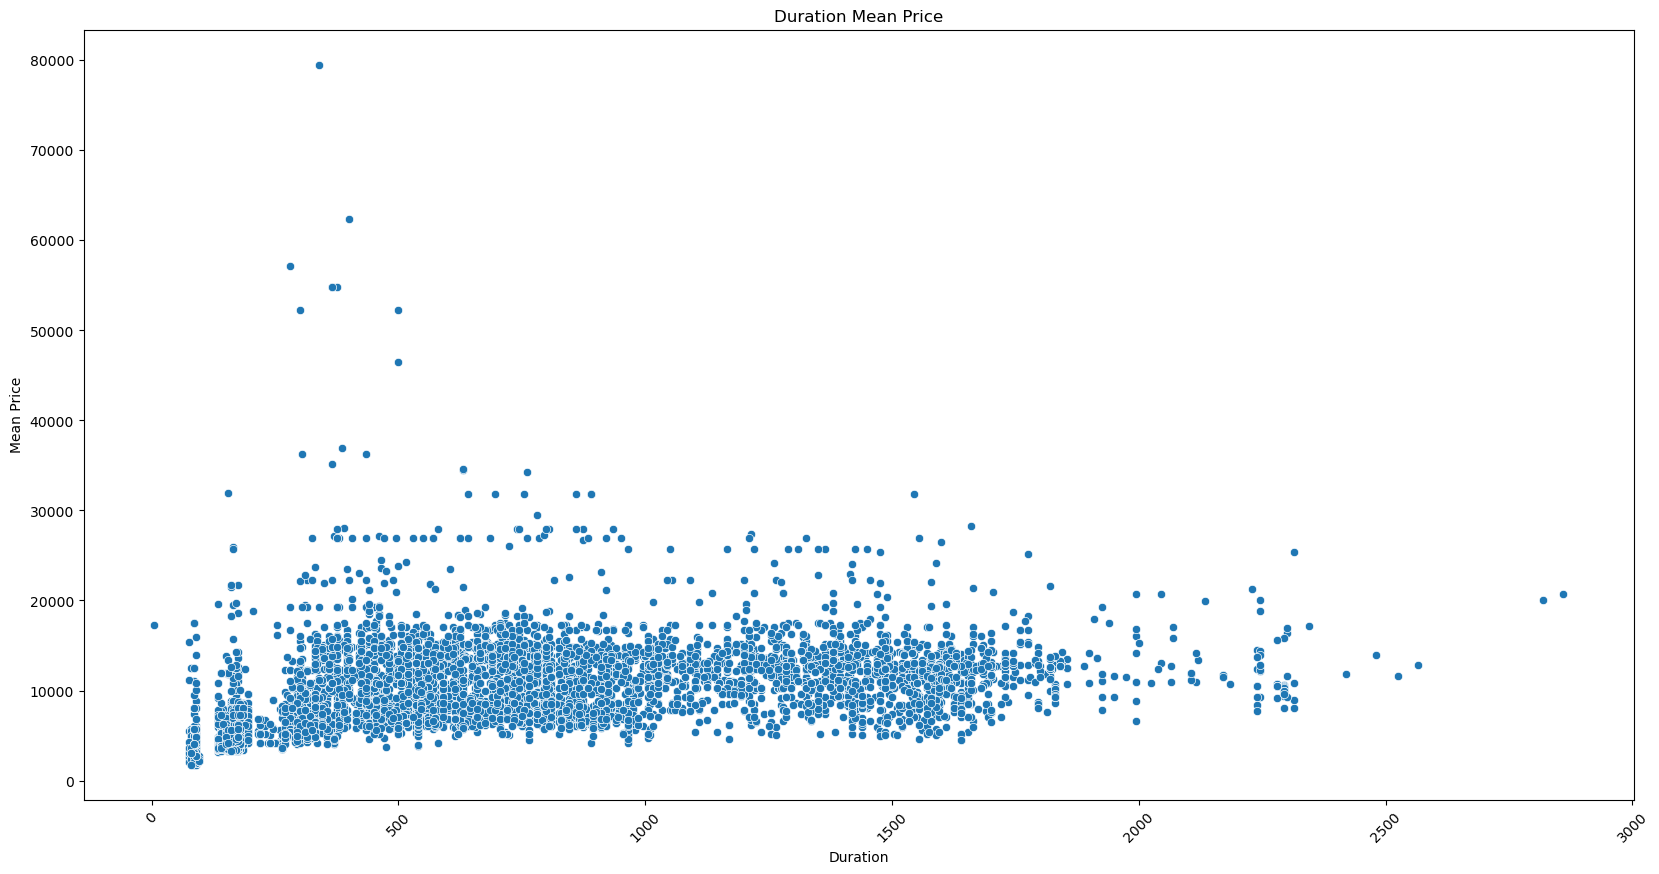

In [163]:
# Duration vs Price
plt.figure(figsize=(20,10))

sns.scatterplot(data=df, x='Duration', y='Price')

# Set labels and title for the plot
plt.xlabel('Duration')
plt.ylabel('Mean Price')
plt.title('Duration Mean Price')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

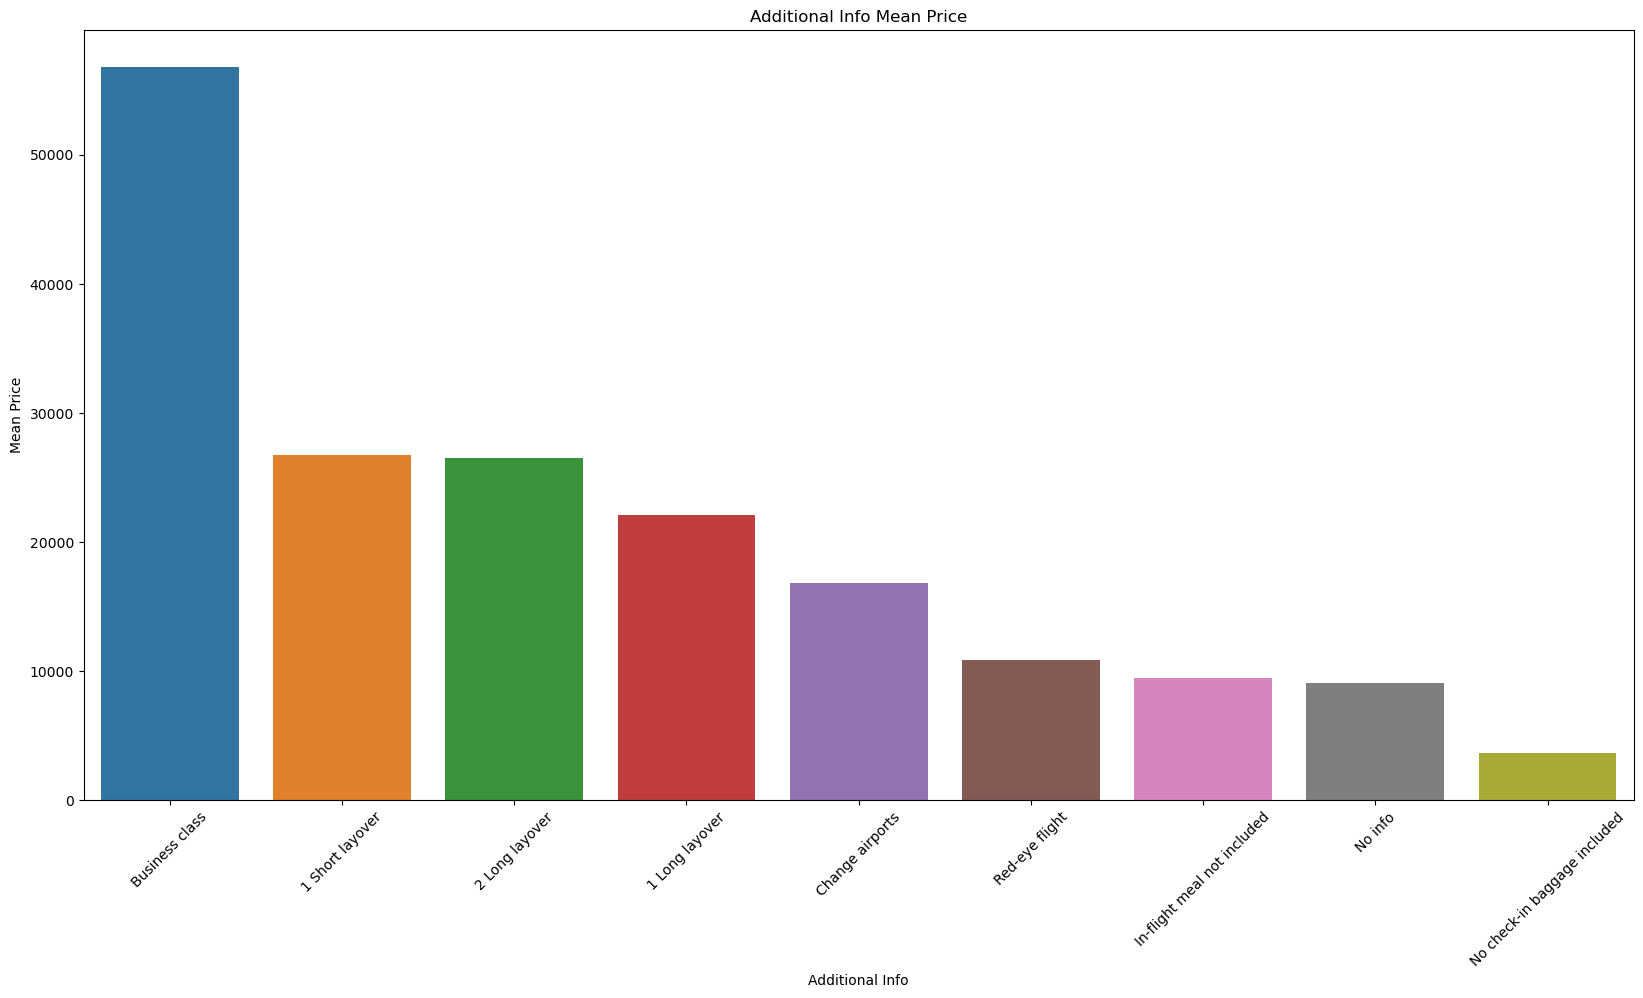

In [164]:
# Additional_Info vs Price
plt.figure(figsize=(20,10))

# Sort the DataFrame by mean price in descending order
sorted_df = df.groupby('Additional_Info')['Price'].mean()\
           .sort_values(ascending=False).reset_index()

sns.barplot(data=sorted_df, x='Additional_Info', y='Price')

# Set labels and title for the plot
plt.xlabel('Additional Info')
plt.ylabel('Mean Price')
plt.title('Additional Info Mean Price')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

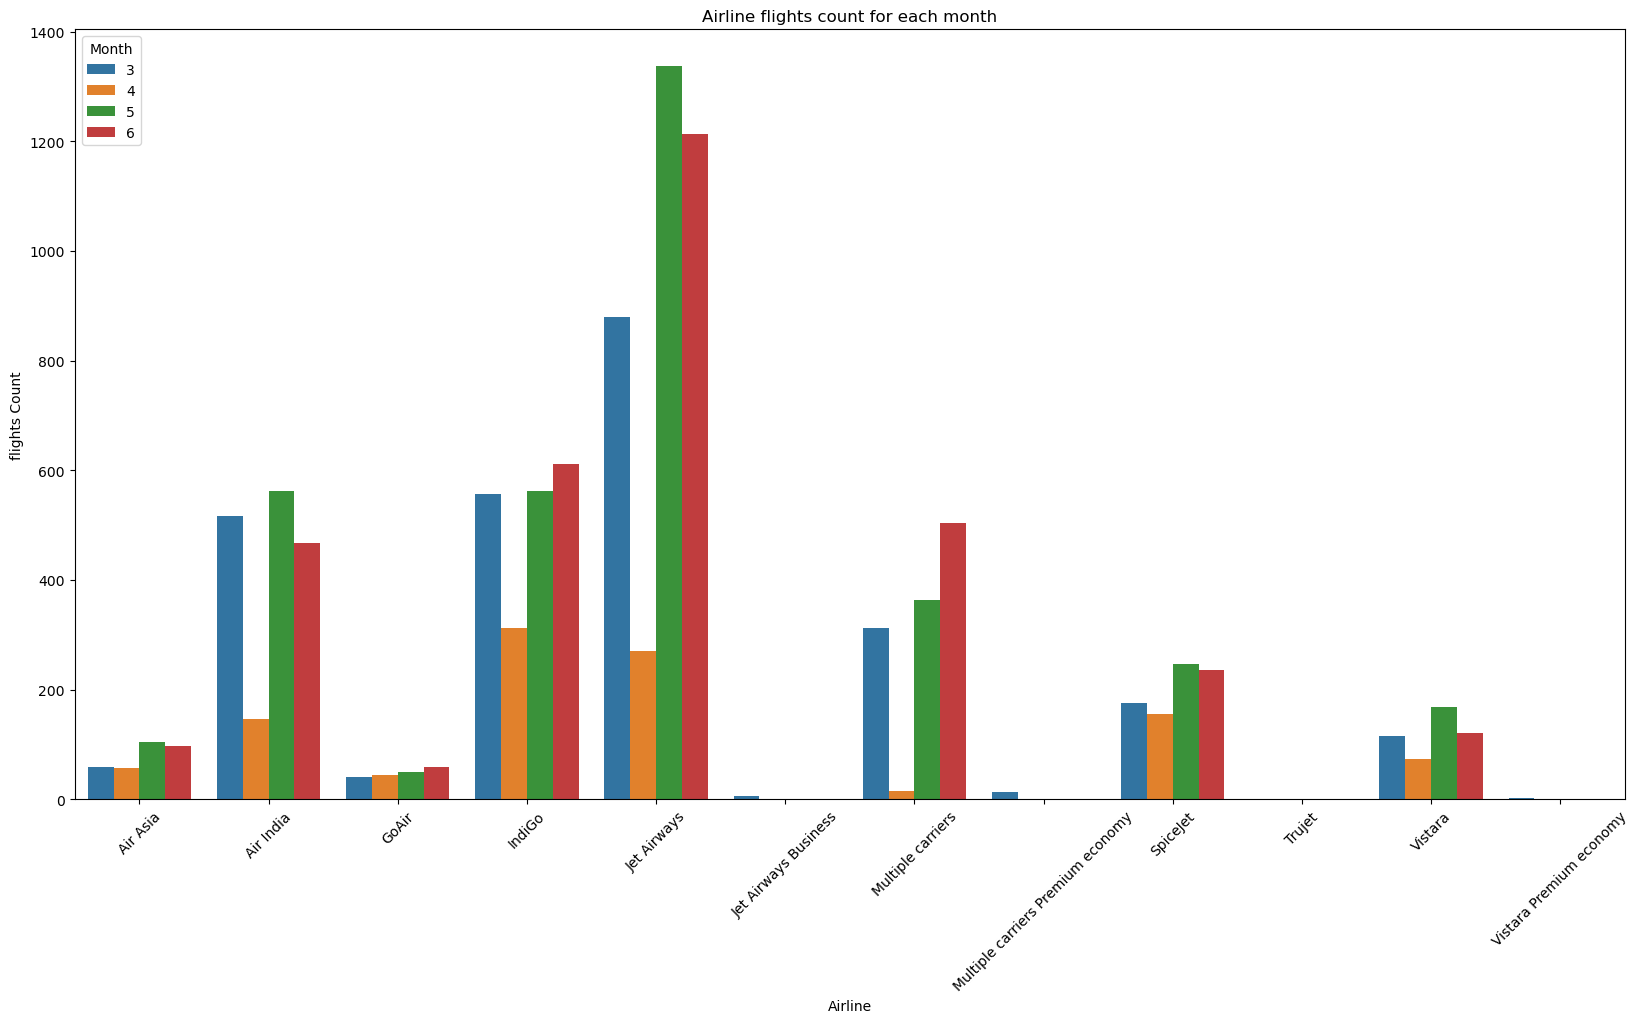

In [165]:
# Airline flights count for each month
plt.figure(figsize=(20,10))

sorted_df = df.groupby(['Airline', 'Month']).size().reset_index().rename(columns={0: 'Count'})

# Plot a Barplot
sns.barplot(data=sorted_df, x='Airline', y='Count', hue='Month')

# Set labels and title for the plot
plt.xlabel('Airline')
plt.ylabel('flights Count')
plt.title('Airline flights count for each month')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

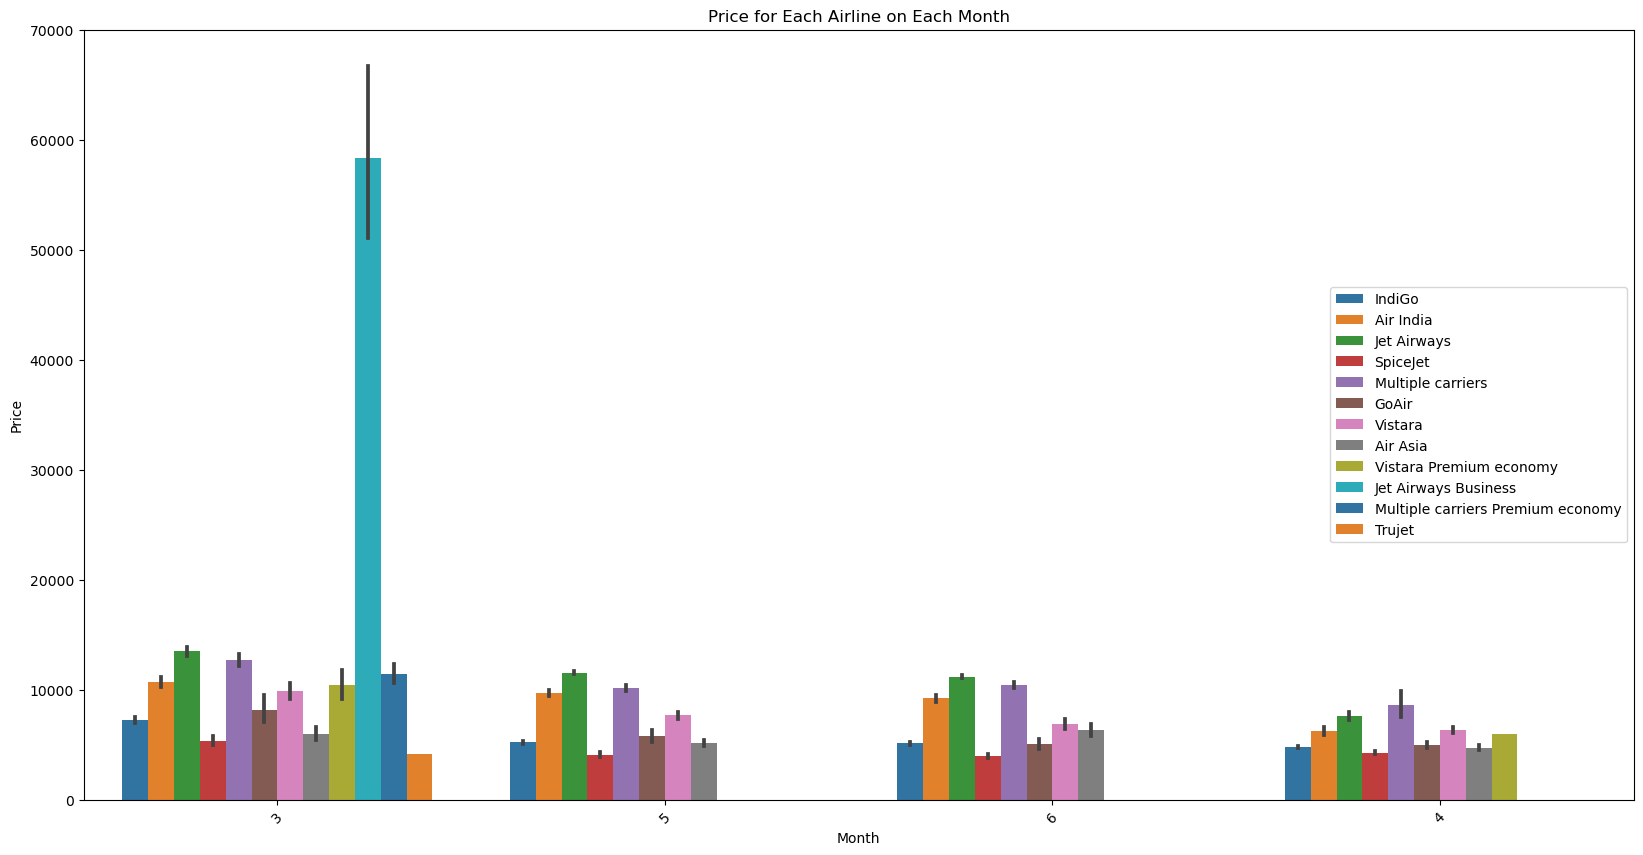

In [166]:
# Airline flights price for each month
plt.figure(figsize=(20, 10))

# Plot monthly prices with barplot
sns.barplot(data=df, x='Month', y='Price', hue='Airline',
              palette='tab10')

# Set labels and title for the plot
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Price for Each Airline on Each Month')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Move the legend to the right
plt.legend(loc='center right')

# Display the plot
plt.show()

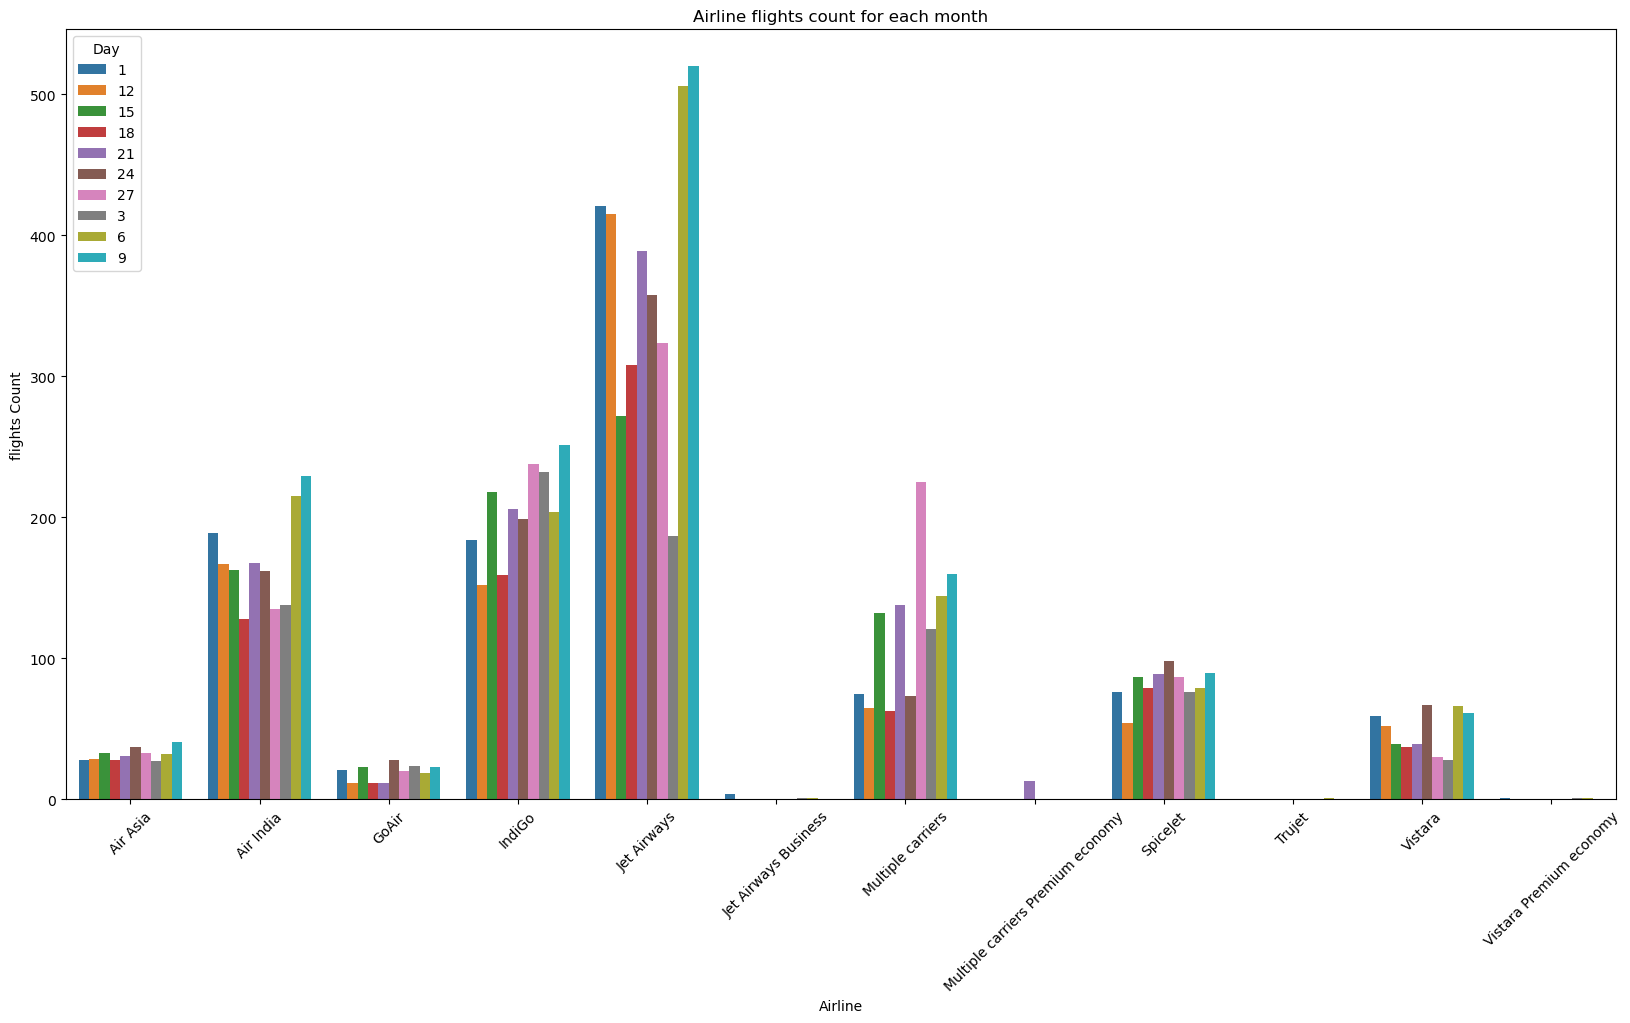

In [167]:
# Airline flights count for each Day
plt.figure(figsize=(20,10))
sorted_df = df.groupby(['Airline', 'Day']).size().reset_index().rename(columns={0: 'Count'})

# Plot a Barplot
sns.barplot(data=sorted_df, x='Airline', y='Count', hue='Day', palette='tab10')

# Set labels and title for the plot
plt.xlabel('Airline')
plt.ylabel('flights Count')
plt.title('Airline flights count for each month')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

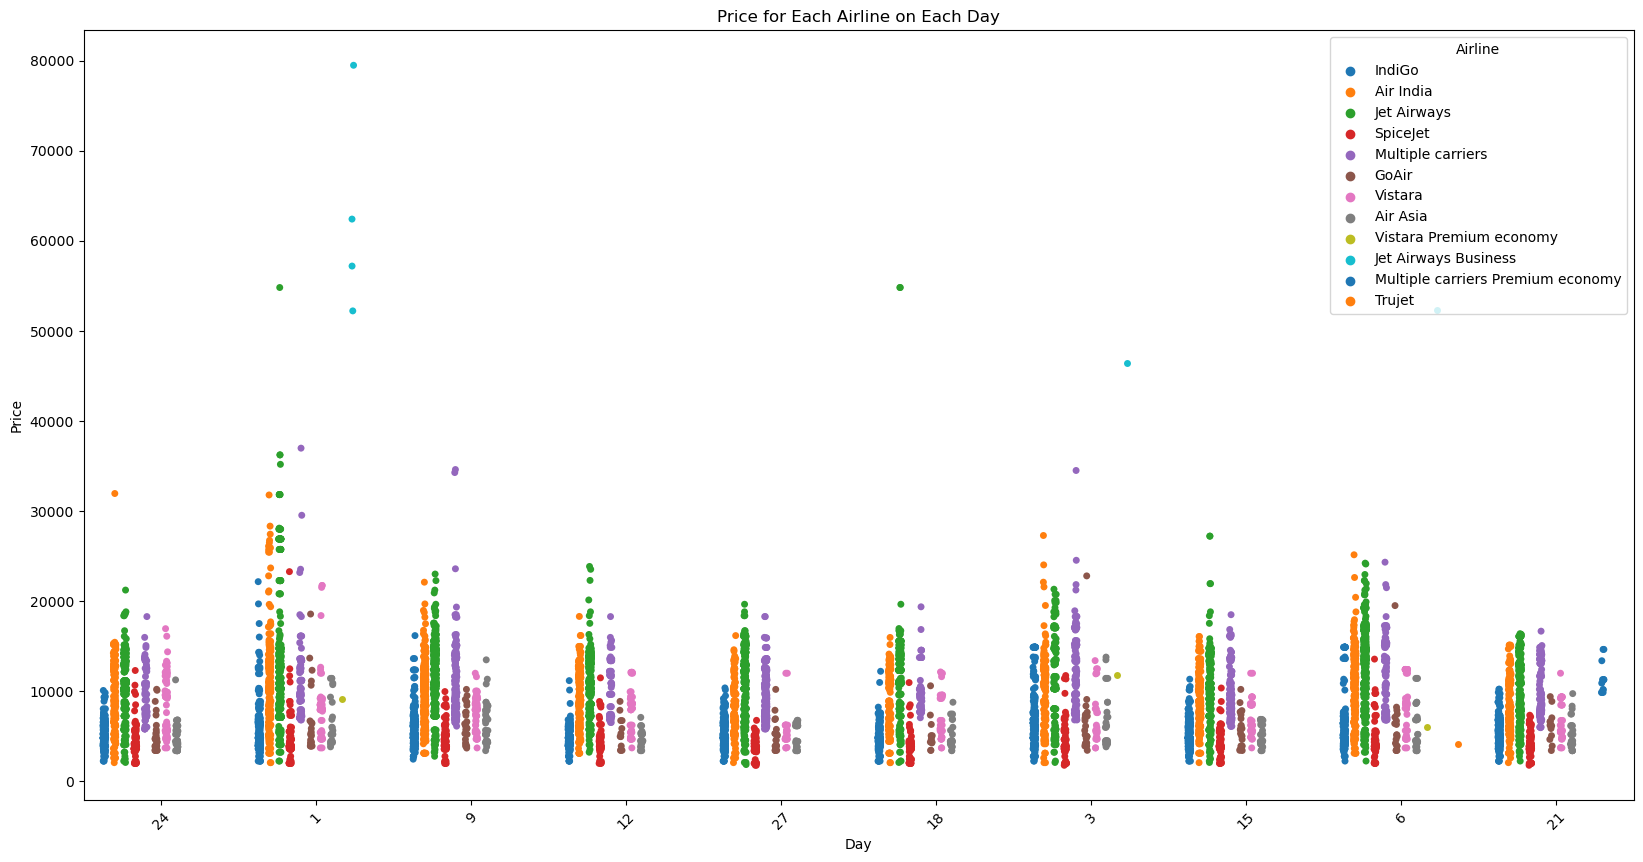

In [168]:
# Airline flights price for each Day
plt.figure(figsize=(20, 10))

# Plot individual prices with stripplot
sns.stripplot(data=df, x='Day', y='Price', hue='Airline',
              jitter=True, dodge=True, palette='tab10')

# Set labels and title for the plot
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Price for Each Airline on Each Day')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

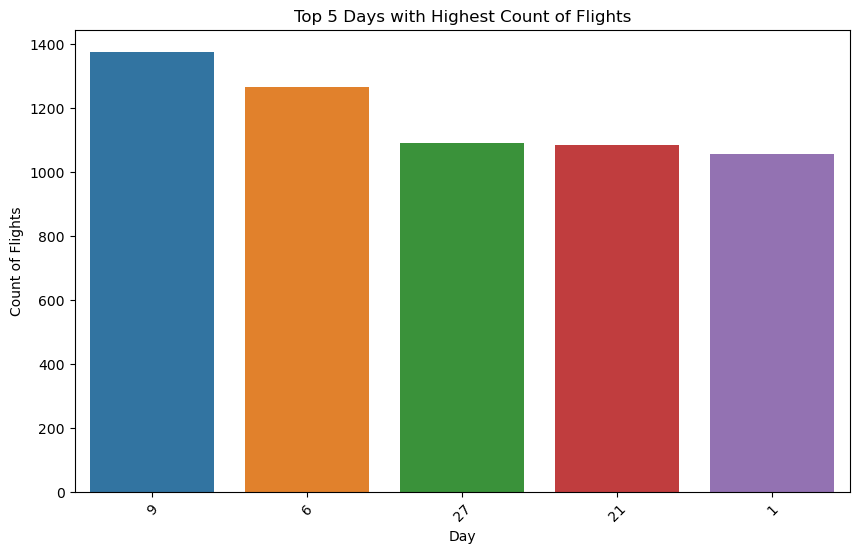

In [169]:
# Calculate the count of flights for each day
flight_counts = df['Day'].value_counts().reset_index()
flight_counts.columns = ['Day', 'Count']

# Sort the data in descending order based on the count of flights
sorted_counts = flight_counts.sort_values('Count', ascending=False)

# Select the top 5 days with the highest count
top_5_days = sorted_counts.head(5)

# Plot a bar chart to visualize the count of flights for the top 5 days
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_days, x='Day', y='Count')

# Set labels and title for the plot
plt.xlabel('Day')
plt.ylabel('Count of Flights')
plt.title('Top 5 Days with Highest Count of Flights')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

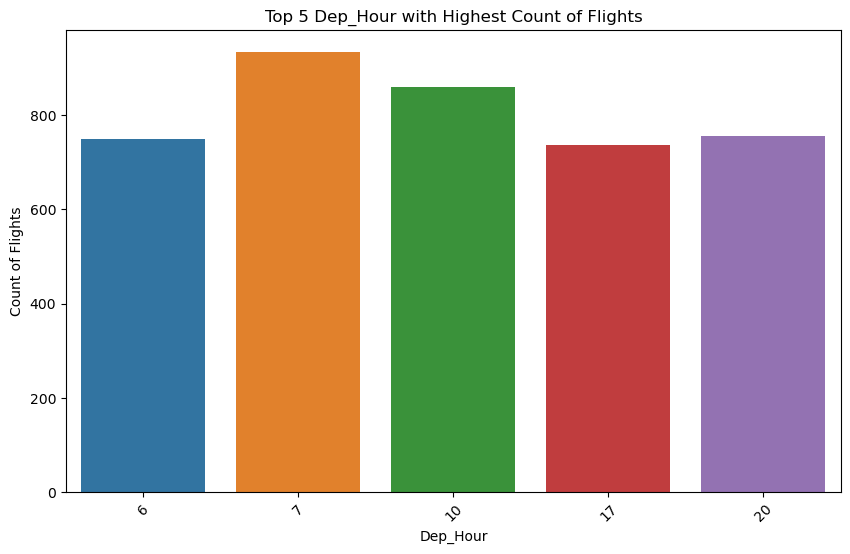

In [170]:
# Calculate the count of flights for each Hour
flight_counts = df['Dep_Hour'].value_counts().reset_index()
flight_counts.columns = ['Dep_Hour', 'Count']

# Sort the data in descending order based on the count of flights
sorted_counts = flight_counts.sort_values('Count', ascending=False)

# Select the top 5 days with the highest count
top_5_days = sorted_counts.head(5)

# Plot a bar chart to visualize the count of flights for the top 5 Hour
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_days, x='Dep_Hour', y='Count')

# Set labels and title for the plot
plt.xlabel('Dep_Hour')
plt.ylabel('Count of Flights')
plt.title('Top 5 Dep_Hour with Highest Count of Flights')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

# 🛠️Feature Engineering 

In [171]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hour
0,IndiGo,Banglore,New Delhi,170,0,No info,3897,24,3,22
1,Air India,Kolkata,Banglore,445,2,No info,7662,1,5,6
2,Jet Airways,Delhi,Cochin,1140,2,No info,13882,9,6,9
3,IndiGo,Kolkata,Banglore,325,1,No info,6218,12,5,18
4,IndiGo,Banglore,New Delhi,285,1,No info,13302,1,3,17


#### ⚖️ Scaling

In [172]:
# scaler object
sc = StandardScaler()

In [173]:
# Scaling 'Duration' Column
df['Duration'] = sc.fit_transform(df['Duration'].values.reshape(-1, 1))

In [174]:
# Scaling 'Dep_Hour' Column
df['Dep_Hour'] = sc.fit_transform(df['Dep_Hour'].values.reshape(-1, 1))

In [175]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hour
0,IndiGo,Banglore,New Delhi,-0.918323,0,No info,3897,24,3,1.608027
1,Air India,Kolkata,Banglore,-0.369065,2,No info,7662,1,5,-1.178392
2,Jet Airways,Delhi,Cochin,1.019061,2,No info,13882,9,6,-0.655938
3,IndiGo,Kolkata,Banglore,-0.608741,1,No info,6218,12,5,0.911422
4,IndiGo,Banglore,New Delhi,-0.688633,1,No info,13302,1,3,0.737271


#### 🏷️ Encoding

#### 'Airline' Column

In [176]:
# create Label Encoder object
le = LabelEncoder()

In [177]:
# Encoding 'Airline' column
df['Airline_en'] = le.fit_transform(df['Airline'])

In [178]:
#show the encoded values
Airline_encodeing = df[['Airline', 'Airline_en']].drop_duplicates()
Airline_encodeing

,Airline,Airline_en
0,IndiGo,3
1,Air India,1
2,Jet Airways,4
5,SpiceJet,8
9,Multiple carriers,6
20,GoAir,2
28,Vistara,10
43,Air Asia,0
426,Vistara Premium economy,11
657,Jet Airways Business,5


#### 'Source' Column

In [179]:
# Encoding 'Source' column
df['Source_en'] = le.fit_transform(df['Source'])

In [180]:
#show the encoded values
Source_encodeing = df[['Source', 'Source_en']].drop_duplicates()
Source_encodeing

,Source,Source_en
0,Banglore,0
1,Kolkata,3
2,Delhi,2
12,Chennai,1
59,Mumbai,4


#### 'Destination' Column

In [181]:
# Encoding 'Destination' column
df['Destination_en'] = le.fit_transform(df['Destination'])

In [182]:
#show the encoded values
Destination_encodeing = df[['Destination', 'Destination_en']].drop_duplicates()
Destination_encodeing

,Destination,Destination_en
0,New Delhi,5
1,Banglore,0
2,Cochin,1
12,Kolkata,4
22,Delhi,2
59,Hyderabad,3


#### 'Additional_Info' Column

In [183]:
# Encoding 'Additional_Info' column
df['Additional_Info_en'] = le.fit_transform(df['Additional_Info'])

In [184]:
#show the encoded values
Additional_Info_encodeing = df[['Additional_Info', 'Additional_Info_en']].drop_duplicates()
Additional_Info_encodeing

,Additional_Info,Additional_Info_en
0,No info,7
6,In-flight meal not included,5
45,No check-in baggage included,6
785,1 Short layover,1
1043,1 Long layover,0
1712,Change airports,4
2924,Business class,3
8122,Red-eye flight,8
10511,2 Long layover,2


### 🗑️Dropping unimportant columns

In [185]:
df = df.drop(columns=['Airline', 'Source', 'Destination', 'Additional_Info', 'Day', 'Month'],
             axis=1)

# 🔬 PCA

In [87]:
from sklearn.decomposition import PCA

In [103]:
pca = PCA(n_components=4)

In [105]:
df_pca = pca.fit_transform(df.drop('Price', axis=1))

In [106]:
pca.explained_variance_ratio_

array([0.45841022, 0.24801413, 0.09248886, 0.08099691])

In [108]:
df2 = pd.DataFrame(pca.components_, columns=df.drop('Price', axis=1).columns)

In [110]:
sums = np.abs(df2).sum()
sums_df = pd.DataFrame([sums], columns=df2.columns)
sums_df

,Duration,Total_Stops,Dep_Hour,Airline_en,Source_en,Destination_en,Additional_Info_en
0,1.258694,0.667287,1.255863,1.15929,0.8609,1.053824,0.548134


##### The PCA algorithm shows that all columns are important in predicting the Price

## 📂Spliting Data

In [186]:
# Feature Extraction
X = df.drop('Price', axis=1).values
y = df['Price'].values

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape)
print(X_test.shape)

(9415, 7)
(1047, 7)


# ⚙️Initialize estimators and hyperparameters

In [81]:

# Initialize the estimators
reg1 = LinearRegression()
reg2 = Lasso()
reg3 = LogisticRegression()
reg4 = GradientBoostingRegressor()
reg5 = RandomForestRegressor()
reg6 = SVR()

In [82]:

# Initialize the hyperparameters
# Linear Regression
param1 = {}
param1['regressor'] = [reg1]                 # No hyperparameters

# Lasso
param2 = {}
param2['regressor'] = [reg2]
param2['regressor__alpha'] = [0.1, 0.01, 0.001]         #Regularization parameter

# Logistic Regression
param3 = {}
param3['regressor'] = [reg3]
param3['regressor__C'] = [1.0, 10, 100]                 # Regularization parameter

# Gradient Boosting
param4 = {}
param4['regressor'] = [reg4]
param4['regressor__max_depth'] = [3, 5]                  # Maximum depth of each tree
param4['regressor__n_estimators'] = [10, 100, 1000]      # Number of boosting stages
param4['regressor__learning_rate'] = [0.1, 0.01, 0.001]  # Learning rate

# RandomForest
param5 = {}
param5['regressor'] = [reg5]
param5['regressor__n_estimators'] = [10, 100, 1000]          # Number of trees in the forest
param5['regressor__max_depth'] = [3, 5]                  # Maximum depth of each tree

# SVR
param6 = {}
param6['regressor'] = [reg6]
param6['regressor__C'] = [1.0, 10, 100]                   # Regularization parameter
param6['regressor__kernel'] = ['linear', 'rbf']           # Kernel function


In [83]:

pipeline = Pipeline([('regressor', reg1)])
params = [param1, param2, param3, param4, 
          param5, param6]


# 📅Grid Search CV

In [84]:
%%time
# Perform grid search cross-validation
grid = GridSearchCV(pipeline, params, cv=3).fit(X_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
9 fits failed out of a total of 111.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1204, in fit
    check_classification_targets(y)
  File "C:\ProgramD

CPU times: total: 13min 41s
Wall time: 14min 5s


In [85]:
# Best performing model and its corresponding hyperparameters
grid.best_params_

{'regressor': GradientBoostingRegressor(n_estimators=1000),
 'regressor__learning_rate': 0.1,
 'regressor__max_depth': 3,
 'regressor__n_estimators': 1000}

In [86]:
# r2 score for the best model
grid.best_score_

0.7215034767545548

# 🎯Randomized Search CV

In [87]:
%%time
# Perform randomized search cross-validation
rs = RandomizedSearchCV(pipeline, params, cv=3, scoring='r2').fit(X_train, y_train)

CPU times: total: 1min 13s
Wall time: 1min 14s


In [88]:
# Best performing model and its corresponding hyperparameters
rs.best_params_

{'regressor__n_estimators': 1000,
 'regressor__max_depth': 3,
 'regressor__learning_rate': 0.1,
 'regressor': GradientBoostingRegressor(n_estimators=1000)}

In [89]:
# r2 score for the best model
rs.best_score_

0.7213647558166466

# 📈The best Model Training

In [188]:
model = GradientBoostingRegressor(learning_rate= 0.1, max_depth=3, n_estimators= 1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [189]:
r2_score(y_test, y_pred)

0.7246769252750487

In [190]:
mean_squared_error(y_test, y_pred)

5632799.132277252

# 💾Saving the model

In [191]:
import joblib

In [192]:
joblib.dump(model, 'aviation_flight_fare_prediction_model.p')

['aviation_flight_fare_prediction_model.p']

# 🧪Test Data preparation

In [193]:
df1 = pd.read_excel("Test_set.xlsx")

In [194]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# 🔍Discovering Data

In [195]:
df1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [196]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


## ❓Missing Values

In [197]:
df1.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

## 🔄Duplicates

In [198]:
df1.duplicated().sum()

26

In [199]:
# drop the duplicate rows only
df1.drop_duplicates(inplace=True, keep='first')

In [200]:
df1.duplicated().sum()

0

## ⭕Categorical Columns

##### 'Airline' Column

In [201]:
df1['Airline'].value_counts()

Jet Airways                          886
IndiGo                               509
Air India                            432
Multiple carriers                    343
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 45
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [202]:
df1['Airline'].nunique()

11

##### 'Additional_Info' Column

In [203]:
df1['Additional_Info'].value_counts()

No info                         2126
In-flight meal not included      440
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64

In [204]:
df1['Additional_Info'].nunique()

6

##### 'Destination' Column

In [205]:
df1['Destination'].value_counts()

Cochin       1127
Banglore      707
Delhi         317
New Delhi     233
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [206]:
df1['Destination'].nunique()

6

##### 'Source' Column

In [207]:
df1['Source'].value_counts()

Delhi       1127
Kolkata      707
Banglore     550
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [208]:
df1['Source'].nunique()

5

##### 'Total_Stops' Column

In [209]:
df1['Total_Stops'].value_counts()

1 stop      1427
non-stop     846
2 stops      360
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [210]:
# delete stop word and keep number of stops only
df1['Total_Stops'] = df1['Total_Stops'].str.replace('non-stop','0').str.replace(' ', '')\
                                     .str.replace('stop','').str.replace('s','')

In [211]:
df1['Total_Stops'].value_counts()

1    1427
0     846
2     360
3      11
4       1
Name: Total_Stops, dtype: int64

In [212]:
df1['Total_Stops'].nunique()

5

## 🔢Numerical Columns

In [213]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info


##### 'Duration' Column

In [214]:
df1['Duration'].head()

0    10h 55m
1         4h
2    23h 45m
3        13h
4     2h 50m
Name: Duration, dtype: object

In [215]:
# convert hours to minutes and delete 'h, m'.
df1['Duration'] = df1['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '')
# convert the column to int data type
df1['Duration'] = df1['Duration'].apply(eval).astype('int64')

In [216]:
df1['Duration'].head()

0     655
1     240
2    1425
3     780
4     170
Name: Duration, dtype: int64

## ⏰Time Columns

#### 'Date_of_Journey' Column

In [217]:
# Extract day, month, and year from 'Date_of_Journey' column
df1[['Day', 'Month', 'Year']] = df1['Date_of_Journey'].str.split('/', expand=True)

In [218]:
# check values of days
df1['Day'].value_counts()

9     341
6     309
15    262
21    255
12    252
24    251
1     238
27    219
3     207
18    203
01     34
06     28
03     26
09     20
Name: Day, dtype: int64

In [219]:
# delete 0 from the day number
df1['Day'] = df1['Day'].str.replace('0', '')

In [220]:
df1['Day'].unique()

array(['6', '12', '21', '24', '1', '15', '18', '3', '9', '27'],
      dtype=object)

In [221]:
# check values of Months
df1['Month'].value_counts()

06    859
05    857
03    682
04    247
Name: Month, dtype: int64

In [222]:
# delete 0 from the Month number
df1['Month'] = df1['Month'].str.replace('0', '')

In [223]:
df1['Month'].unique()

array(['6', '5', '3', '4'], dtype=object)

In [224]:
# # check values of Years
df1['Year'].value_counts()

2019    2645
Name: Year, dtype: int64

#### 'Dep_Time' Column

In [225]:
# convert Dep_Time column to datetime object
df1['Dep_Time'] = pd.to_datetime(df1['Dep_Time'])

In [226]:
# increase the hour if the minutes above 30
def apro_time(time):
    adjusted_time = time + pd.DateOffset(hours=1) if time.minute > 30 else time
    
    return adjusted_time.hour

In [227]:
# apply 'apro_time' on 'Dep_Time' column
df1['Dep_Hour'] = df1['Dep_Time'].apply(apro_time)

## 🗑️ Dropping Unimportant Columns

In [228]:
# delete unimportant columns
df1 = df1.drop(['Date_of_Journey', 'Route', 'Arrival_Time', 'Dep_Time', 'Year'], axis=1)

In [229]:
df1.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Day,Month,Dep_Hour
0,Jet Airways,Delhi,Cochin,655,1,No info,6,6,17
1,IndiGo,Kolkata,Banglore,240,1,No info,12,5,6
2,Jet Airways,Delhi,Cochin,1425,1,In-flight meal not included,21,5,19
3,Multiple carriers,Delhi,Cochin,780,1,No info,21,5,8
4,Air Asia,Banglore,Delhi,170,0,No info,24,6,0


# 🛠️Feature Engineering 

In [230]:
df1.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Day,Month,Dep_Hour
0,Jet Airways,Delhi,Cochin,655,1,No info,6,6,17
1,IndiGo,Kolkata,Banglore,240,1,No info,12,5,6
2,Jet Airways,Delhi,Cochin,1425,1,In-flight meal not included,21,5,19
3,Multiple carriers,Delhi,Cochin,780,1,No info,21,5,8
4,Air Asia,Banglore,Delhi,170,0,No info,24,6,0


#### ⚖️ Scaling

In [231]:
# Scaling 'Duration' Column
df1['Duration'] = sc.fit_transform(df1['Duration'].values.reshape(-1, 1))

In [232]:
# Scaling 'Dep_Hour' Column
df1['Dep_Hour'] = sc.fit_transform(df1['Dep_Hour'].values.reshape(-1, 1))

In [233]:
df1.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Day,Month,Dep_Hour
0,Jet Airways,Delhi,Cochin,0.038653,1,No info,6,6,0.715939
1,IndiGo,Kolkata,Banglore,-0.789942,1,No info,12,5,-1.221038
2,Jet Airways,Delhi,Cochin,1.576046,1,In-flight meal not included,21,5,1.068117
3,Multiple carriers,Delhi,Cochin,0.288230,1,No info,21,5,-0.868860
4,Air Asia,Banglore,Delhi,-0.929705,0,No info,24,6,-2.277571


#### 🏷️ Encoding

#### 'Airline' Column

In [234]:
# create Label Encoder object
le = LabelEncoder()

In [235]:
# Encoding 'Airline' column
df1['Airline_en'] = le.fit_transform(df1['Airline'])

In [236]:
#show the encoded values
Airline_encodeing1 = df1[['Airline', 'Airline_en']].drop_duplicates()
Airline_encodeing1

,Airline,Airline_en
0,Jet Airways,4
1,IndiGo,3
3,Multiple carriers,6
4,Air Asia,0
6,Air India,1
17,Vistara,9
35,SpiceJet,8
64,Vistara Premium economy,10
82,GoAir,2
1054,Multiple carriers Premium economy,7


#### 'Source' Column

In [237]:
# Encoding 'Source' column
df1['Source_en'] = le.fit_transform(df1['Source'])

In [238]:
#show the encoded values
Source_encodeing1 = df1[['Source', 'Source_en']].drop_duplicates()
Source_encodeing1

,Source,Source_en
0,Delhi,2
1,Kolkata,3
4,Banglore,0
34,Mumbai,4
45,Chennai,1


#### 'Destination' Column

In [239]:
# Encoding 'Destination' column
df1['Destination_en'] = le.fit_transform(df1['Destination'])

In [240]:
#show the encoded values
Destination_encodeing1 = df1[['Destination', 'Destination_en']].drop_duplicates()
Destination_encodeing1

,Destination,Destination_en
0,Cochin,1
1,Banglore,0
4,Delhi,2
6,New Delhi,5
34,Hyderabad,3
45,Kolkata,4


#### 'Additional_Info' Column

In [241]:
# Encoding 'Additional_Info' column
df1['Additional_Info_en'] = le.fit_transform(df1['Additional_Info'])

In [242]:
#show the encoded values
Additional_Info_encodeing1 = df1[['Additional_Info', 'Additional_Info_en']].drop_duplicates()
Additional_Info_encodeing1

,Additional_Info,Additional_Info_en
0,No info,5
2,In-flight meal not included,3
35,No check-in baggage included,4
954,1 Long layover,0
1802,Business class,1
1861,Change airports,2


### 🗑️Dropping unimportant columns

In [243]:
df1 = df1.drop(columns=['Airline', 'Source', 'Destination', 'Additional_Info', 'Day', 'Month'],
             axis=1)

# 🔄 Load the Model and Predict the Test Data

In [244]:
model = joblib.load('aviation_flight_fare_prediction_model.p')

In [251]:
df1 = df1.drop(columns=['Price'],
             axis=1)

In [252]:
df1['Price'] = model.predict(df1).reshape(-1, 1)

C:\Users\CM\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [253]:
df1.head()

,Duration,Total_Stops,Dep_Hour,Airline_en,Source_en,Destination_en,Additional_Info_en,Price
0,0.038653,1,0.715939,4,2,1,5,10162.365837
1,-0.789942,1,-1.221038,3,3,0,5,4312.660326
2,1.576046,1,1.068117,4,2,1,3,16000.370413
3,0.288230,1,-0.868860,6,2,1,5,10426.043777
4,-0.929705,0,-2.277571,0,0,2,5,3370.380998


## <span style="color:Brown; font-family:Arial;">Thanks, OmaymaAli</span>